In [29]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_path = "books.csv"

books = pd.read_csv(data_path)

books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [ ]:
def analyze_dataframe(df):
    analysis_results = []
    
    
    for column in df.columns:
        missing = df[column].isnull().sum()  # Count missing values
        count = df[column].count()           # Count non-null values
        distinct = df[column].nunique()      # Count distinct values
        value_counts = df[column].value_counts()  # Get value counts
        
        # Check if there are any non-null values to avoid errors
        if not value_counts.empty:
            top = value_counts.index[0]       # Top (most frequent) value
            freq = value_counts.iloc[0]       # Frequency of the top value
        else:
            top = None
            freq = 0
        
        # Append the results as a dictionary to the list
        analysis_results.append({
            "Column": column,
            "Missing": missing,
            "Count": count,
            "Distinct": distinct,
            "Top": top,
            "Frequency": freq
        })
    
    # Concatenate all results into a single DataFrame
    analysis_df = pd.DataFrame(analysis_results)
    
    return analysis_df




result = analyze_dataframe(books)
result

,Column,Missing,Count,Distinct,Top,Frequency
0,isbn13,0,6810,6810,9780002005883,1
1,isbn10,0,6810,6810,0002005883,1
2,title,0,6810,6398,The Lord of the Rings,11
3,subtitle,4429,2381,2009,A Novel,226
4,authors,72,6738,3780,Agatha Christie,37
5,categories,99,6711,567,Fiction,2588
6,thumbnail,329,6481,6481,http://books.google.com/books/content?id=KQZCP...,1
7,description,262,6548,6474,This is a reproduction of the original artefac...,6
8,published_year,6,6804,94,2006.0,894
9,average_rating,43,6767,200,4.0,126


**Let’s analyze the provided DataFrame and extract important insights for each column. Here's a breakdown of the key points:**

---

### **1. `isbn13`**
- **Missing**: 0 (No missing values)
- **Count**: 6810 (All rows have non-null values)
- **Distinct**: 6810 (Each value is unique, indicating no duplicates)
- **Top**: `9780002005883` (This is one of the ISBN13 values, but it appears only once)
- **Frequency**: 1 (Since all values are unique, the frequency of any single value is 1)

**Key Insight**: The `isbn13` column is a unique identifier for books, with no duplicates or missing values.

---

### **2. `isbn10`**
- **Missing**: 0 (No missing values)
- **Count**: 6810 (All rows have non-null values)
- **Distinct**: 6810 (Each value is unique, indicating no duplicates)
- **Top**: `0002005883` (This is one of the ISBN10 values, but it appears only once)
- **Frequency**: 1 (Since all values are unique, the frequency of any single value is 1)

**Key Insight**: Similar to `isbn13`, the `isbn10` column is also a unique identifier for books, with no duplicates or missing values.

---

### **3. `title`**
- **Missing**: 0 (No missing values)
- **Count**: 6810 (All rows have non-null values)
- **Distinct**: 6398 (Most titles are unique, but some duplicates exist)
- **Top**: `The Lord of the Rings` (This is the most frequent title)
- **Frequency**: 11 (This title appears 11 times in the dataset)

**Key Insight**: While most titles are unique, there are some duplicate titles, such as "The Lord of the Rings," which may indicate different editions or formats of the same book.

---

### **4. `subtitle`**
- **Missing**: 4429 (A significant number of rows are missing subtitles)
- **Count**: 2381 (Only 2381 rows have subtitles)
- **Distinct**: 2009 (Most subtitles are unique)
- **Top**: `A Novel` (This is the most frequent subtitle)
- **Frequency**: 226 (This subtitle appears 226 times)

**Key Insight**: Subtitles are optional, as more than half of the rows lack this information. However, when present, they are mostly unique, with "A Novel" being the most common subtitle.

---

### **5. `authors`**
- **Missing**: 72 (A small number of rows are missing authors)
- **Count**: 6738 (Most rows have author information)
- **Distinct**: 3780 (Many unique authors are represented)
- **Top**: `Agatha Christie` (This is the most frequent author)
- **Frequency**: 37 (This author appears 37 times)

**Key Insight**: The dataset includes a wide variety of authors, with Agatha Christie being the most prolific author in the dataset.

---

### **6. `categories`**
- **Missing**: 99 (A small number of rows are missing categories)
- **Count**: 6711 (Most rows have category information)
- **Distinct**: 567 (A moderate number of unique categories)
- **Top**: `Fiction` (This is the most frequent category)
- **Frequency**: 2588 (This category appears 2588 times)

**Key Insight**: The dataset is heavily dominated by the "Fiction" category, which accounts for nearly 38% of all categorized books.

---

### **7. `thumbnail`**
- **Missing**: 329 (A moderate number of rows are missing thumbnails)
- **Count**: 6481 (Most rows have thumbnail URLs)
- **Distinct**: 6481 (Each thumbnail URL is unique)
- **Top**: `http://books.google.com/books/content?id=KQZCP...` (This is one of the thumbnail URLs, but it appears only once)
- **Frequency**: 1 (Since all values are unique, the frequency of any single value is 1)

**Key Insight**: Thumbnails are mostly unique, but about 5% of the rows lack this information.

---

### **8. `description`**
- **Missing**: 262 (A moderate number of rows are missing descriptions)
- **Count**: 6548 (Most rows have descriptions)
- **Distinct**: 6474 (Most descriptions are unique)
- **Top**: `This is a reproduction of the original artefac...` (This is the most frequent description)
- **Frequency**: 6 (This description appears 6 times)

**Key Insight**: Descriptions are mostly unique, but some books share the same description, possibly due to similar content or metadata reuse.

---

### **9. `published_year`**
- **Missing**: 6 (A very small number of rows are missing publication years)
- **Count**: 6804 (Most rows have publication year information)
- **Distinct**: 94 (A relatively small number of unique publication years)
- **Top**: `2006.0` (This is the most frequent publication year)
- **Frequency**: 894 (This year appears 894 times)

**Key Insight**: The dataset contains books published over many years, with a significant concentration of books published in 2006.

---

### **10. `average_rating`**
- **Missing**: 43 (A small number of rows are missing average ratings)
- **Count**: 6767 (Most rows have average rating information)
- **Distinct**: 200 (A moderate number of unique average ratings)
- **Top**: `4.0` (This is the most frequent average rating)
- **Frequency**: 126 (This rating appears 126 times)

**Key Insight**: The average rating distribution is diverse, but `4.0` is the most common rating, suggesting that many books are rated highly.

---

### **11. `num_pages`**
- **Missing**: 43 (A small number of rows are missing page counts)
- **Count**: 6767 (Most rows have page count information)
- **Distinct**: 915 (A moderate number of unique page counts)
- **Top**: `288.0` (This is the most frequent page count)
- **Frequency**: 141 (This page count appears 141 times)

**Key Insight**: The number of pages varies widely, but `288` pages is the most common length for books in the dataset.

---

### **12. `ratings_count`**
- **Missing**: 43 (A small number of rows are missing ratings counts)
- **Count**: 6767 (Most rows have ratings count information)
- **Distinct**: 3881 (A large number of unique ratings counts)
- **Top**: `4.0` (This is the most frequent ratings count)
- **Frequency**: 39 (This ratings count appears 39 times)

**Key Insight**: The ratings count varies significantly, but `4.0` is the most common value, likely indicating books with fewer ratings.

---

### **Summary of Key Insights**
1. **Unique Identifiers**: Both `isbn13` and `isbn10` are fully populated and unique, making them reliable identifiers.
2. **Titles and Authors**: Titles are mostly unique, but some duplicates exist. Agatha Christie is the most frequent author.
3. **Categories**: The dataset is dominated by the "Fiction" category.
4. **Subtitles and Descriptions**: These fields are optional, with many missing values. When present, they are mostly unique.
5. **Publication Year**: Books are concentrated around certain years, particularly 2006.
6. **Ratings and Pages**: Average ratings and page counts show diversity, with `4.0` and `288` being the most common values, respectively.


In [8]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


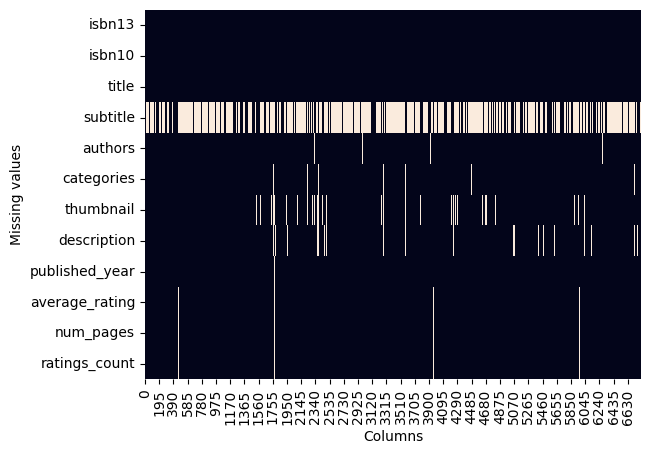

In [13]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing values")
plt.show()

In [3]:
books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2024 - books["published_year"]

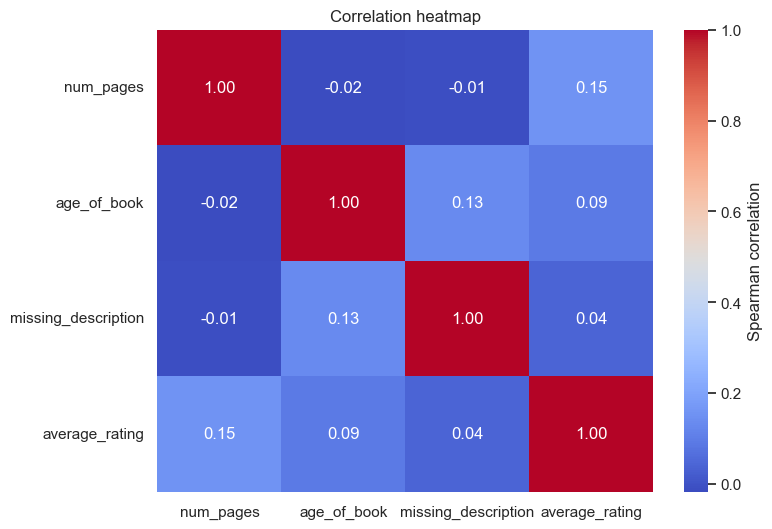

In [11]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

a new DataFrame called `book_missing` that contains only the rows from the original books DataFrame where the "description", "num_pages",   "average_rating", and "published_year" columns all have non-missing values. It effectively filters out rows that have missing data in any of those four columns. 

In [4]:
book_missing = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
]

book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


In [5]:
categories_df = book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)
categories_df

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


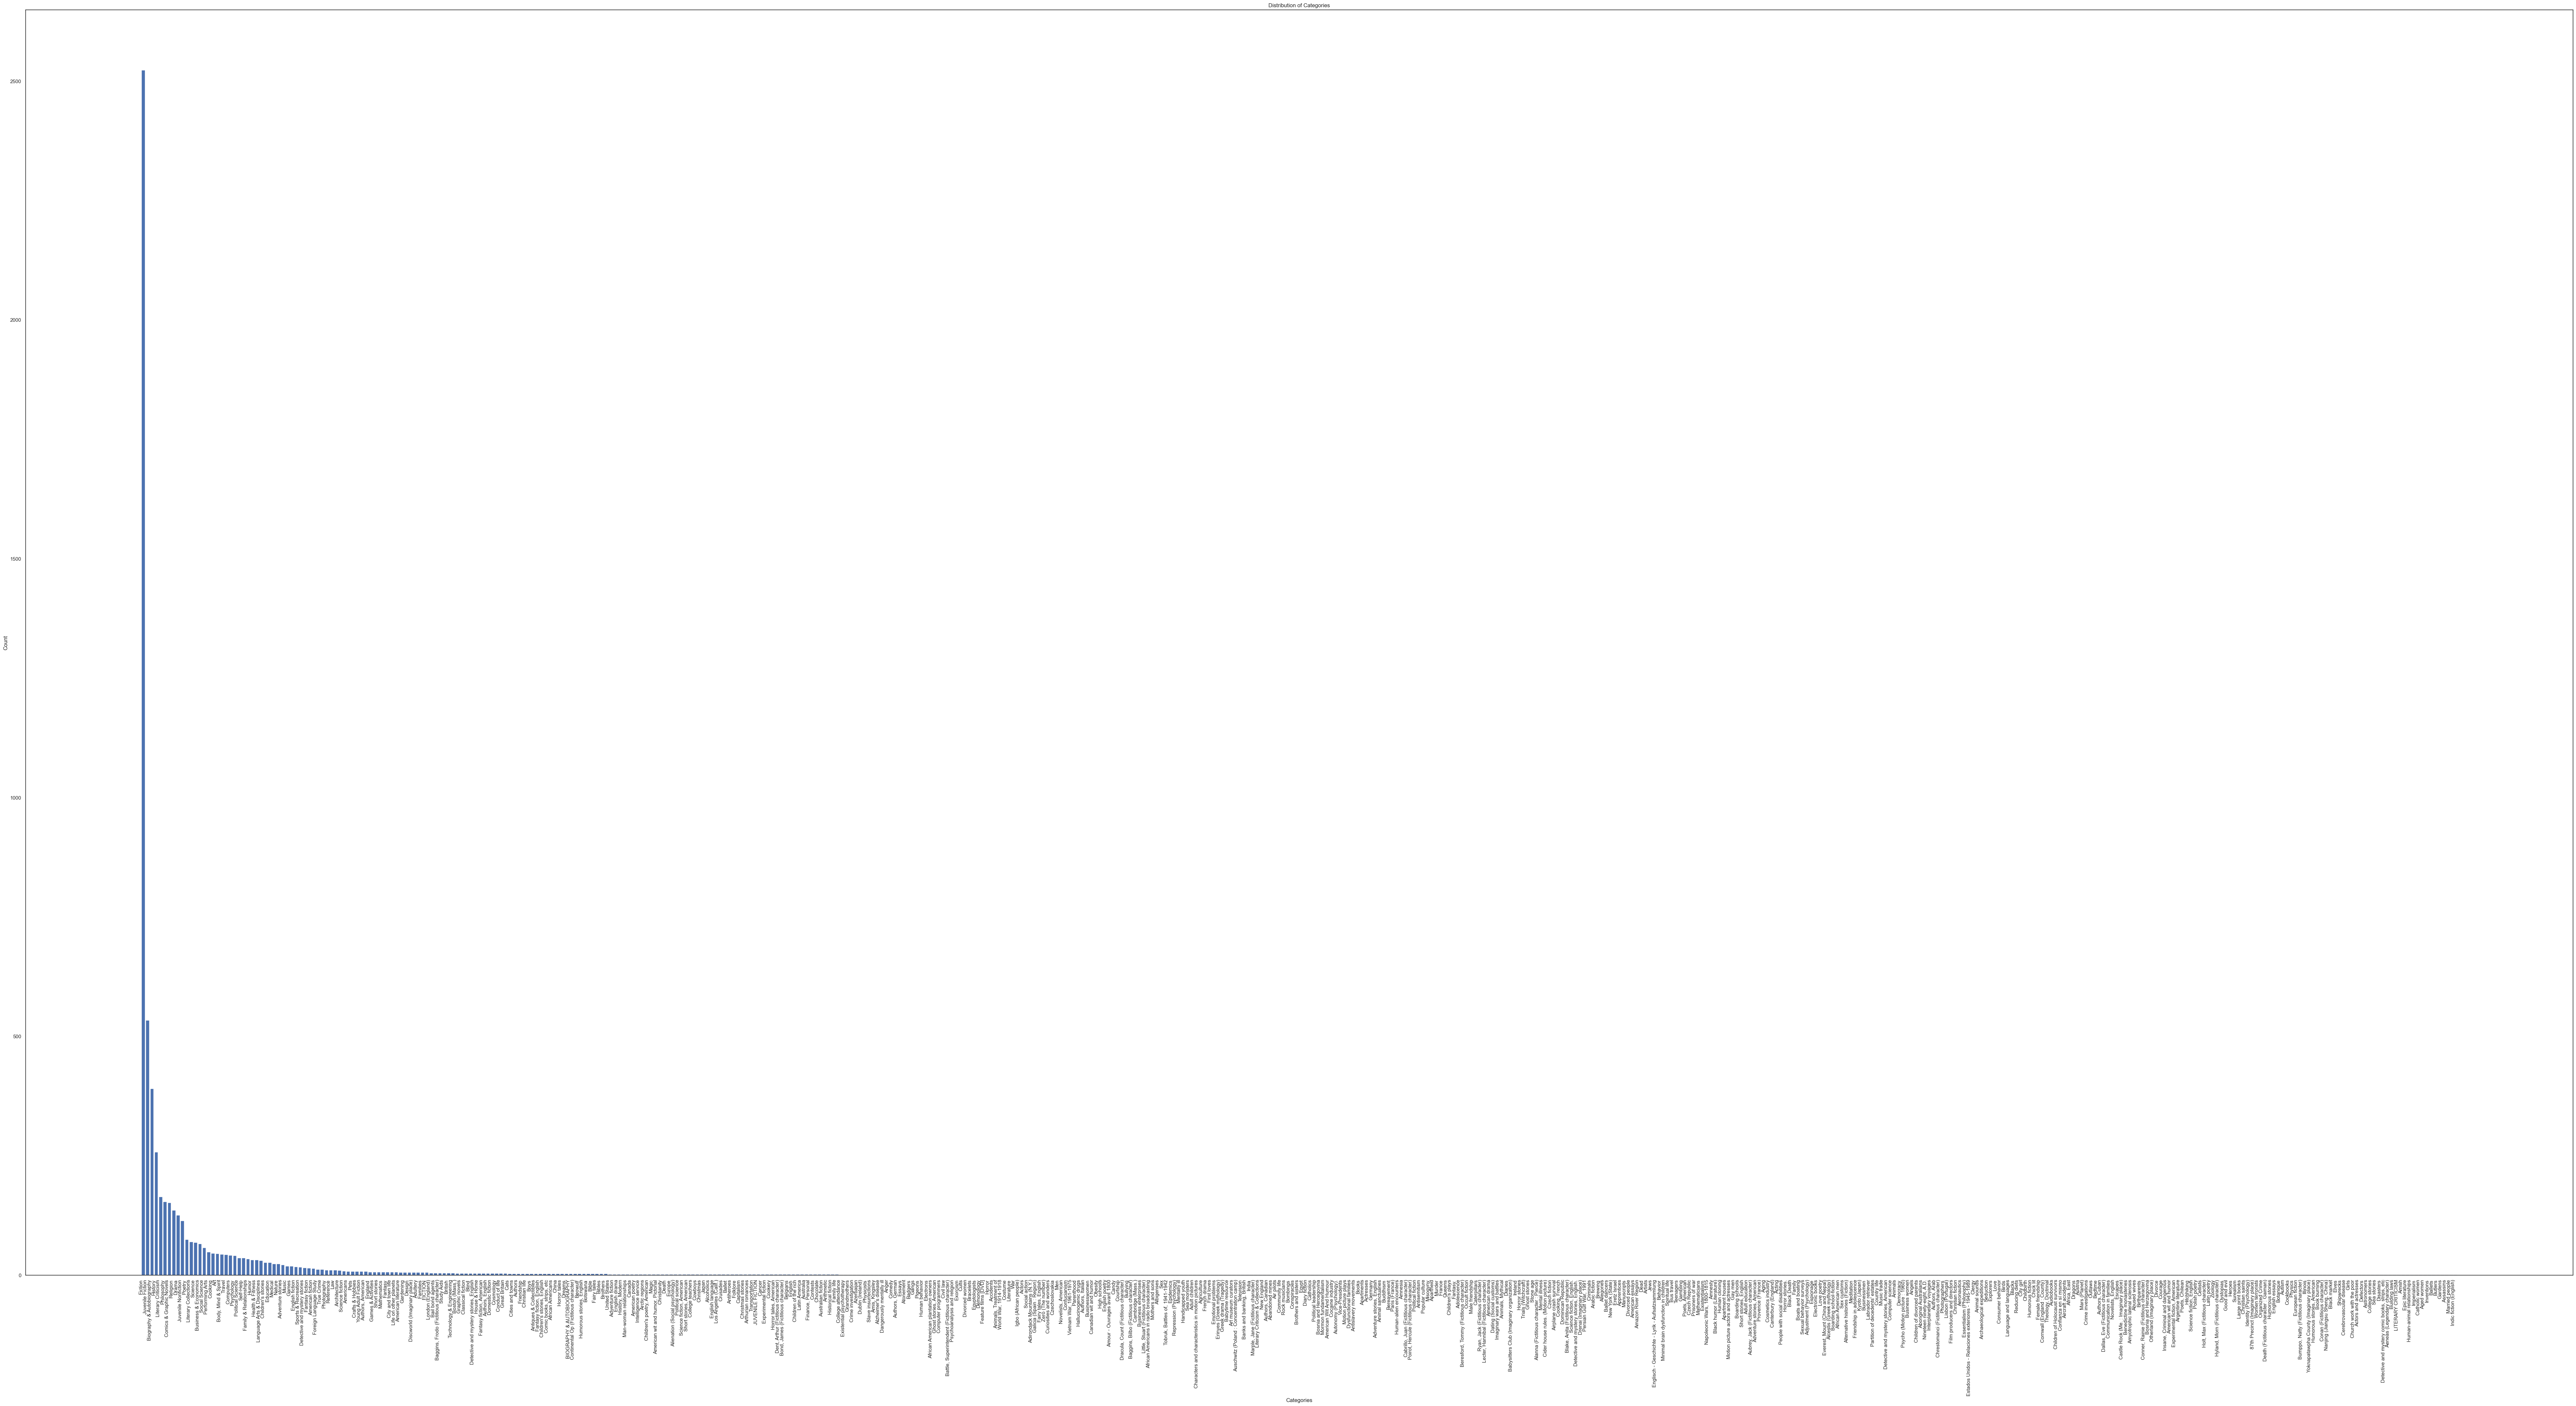

In [ ]:
plt.figure(figsize=(100, 50))  # Adjust figure size for better readability if needed
plt.bar(categories_df['categories'], categories_df['count'])

# Customize the chart
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability (optional)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()

In [31]:
book_missing["description"].head(10)

0    A NOVEL THAT READERS and critics have been eag...
1    A new 'Christie for Christmas' -- a full-lengt...
2    Volume Two of Stephen Donaldson's acclaimed se...
3    A memorable, mesmerizing heroine Jennifer -- b...
4    Lewis' work on the nature of love divides love...
5    "In The Problem of Pain, C.S. Lewis, one of th...
6                                            Donation.
7    Until Vasco da Gama discovered the sea-route t...
8    A new-cover reissue of the fourth book in the ...
9    Kate Blackwell is an enigma and one of the mos...
Name: description, dtype: object

In [ ]:
# calculate the number of words in the 'description' column
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

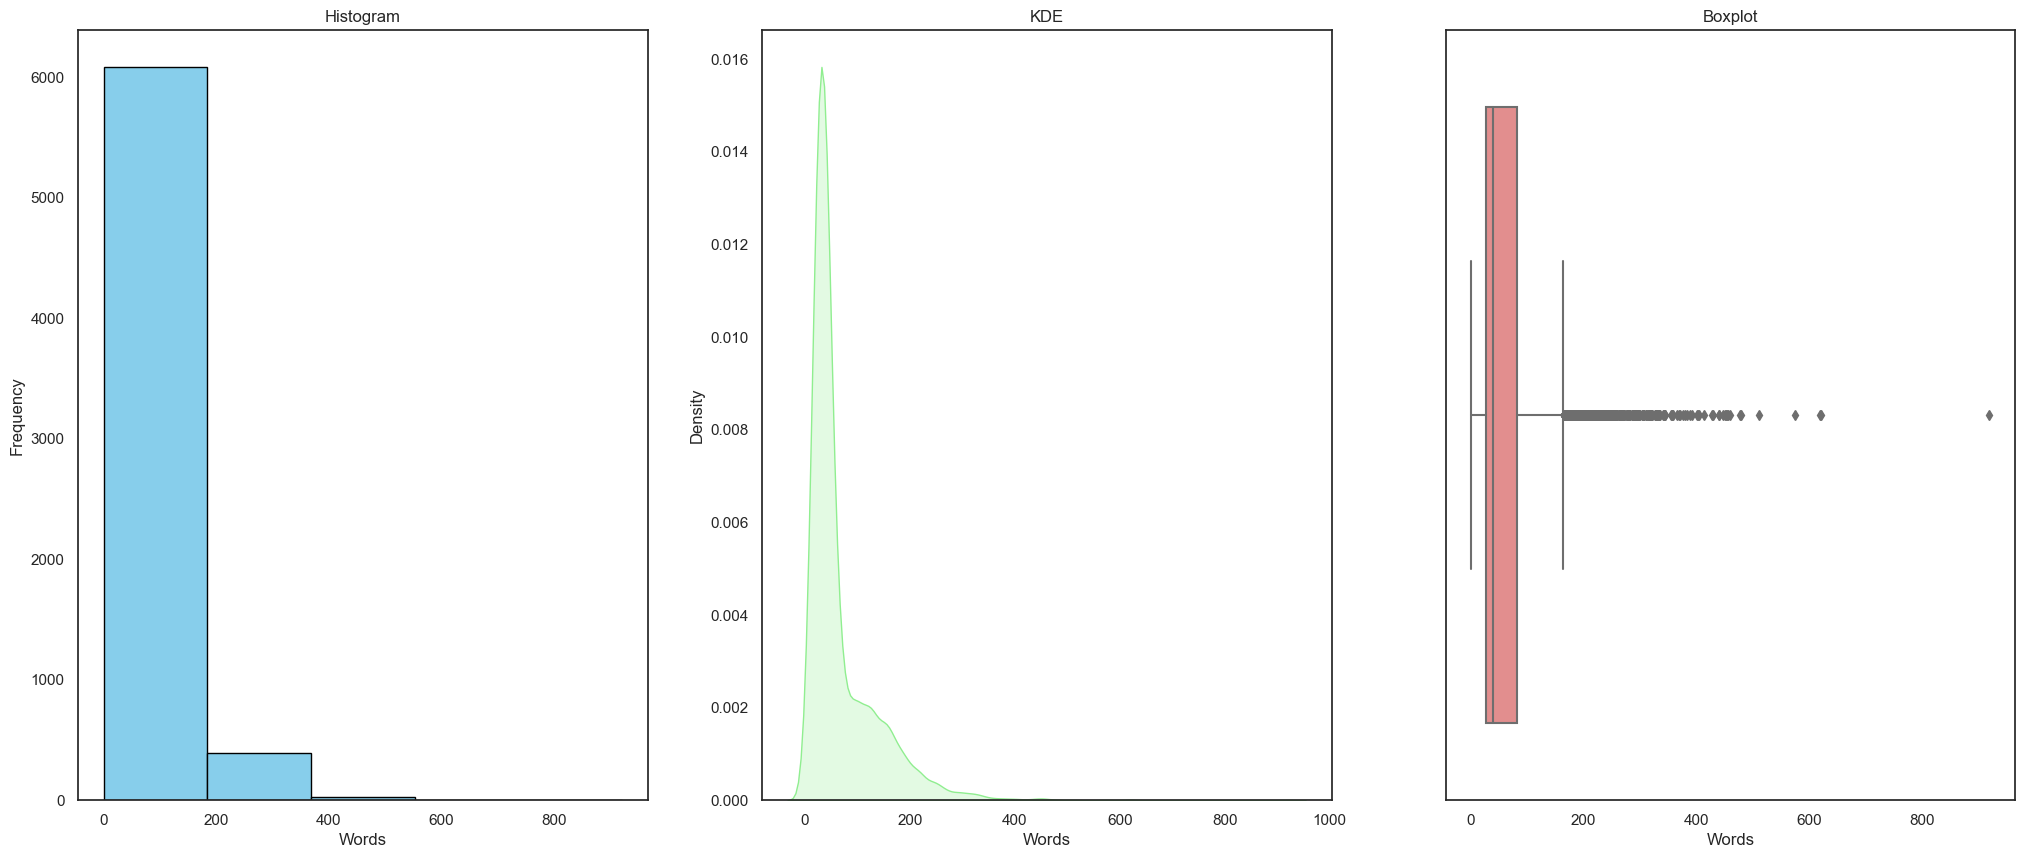

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10)) 

# Plot 1: Histogram
axes[0].hist(book_missing["words_in_description"], bins=5, color="skyblue", edgecolor="black")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram")

# Plot 2: KDE
sns.kdeplot(book_missing["words_in_description"], fill=True, color="lightgreen", ax=axes[1])
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Density")
axes[1].set_title("KDE")

# Plot 3: Boxplot
sns.boxplot(x=book_missing["words_in_description"], color="lightcoral", ax=axes[2])
axes[2].set_xlabel("Words")
axes[2].set_title("Boxplot")

plt.show()

In [26]:
# a Series containing the "description" values for the rows where the "words_in_description" column has a value between 1 and 4.
# these are too short and not very helpful

print("The total number of books with a description value between 1 and 4: ", 
      len(book_missing.loc[(book_missing["words_in_description"].between(1, 4), "description")]))

book_missing.loc[(book_missing["words_in_description"].between(1, 4), "description")]


The total number of books with a description value between 1 and 4:  55


6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [27]:
# a Series containing the "description" values for the rows where the "words_in_description" column has a value between 5 and 14.
# this is not giving us particularly good information

print("The total number of books with a description value between 5 and 14: ", 
      len(book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]))

book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]

The total number of books with a description value between 5 and 14:  308


2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [28]:
# a Series containing the "description" values for the rows where the "words_in_description" column has a value between 15 and 24.
# still not enough

print("The total number of books with a description value between 15 and 24: ", 
      len(book_missing.loc[book_missing["words_in_description"].between(15, 24), "description"]))

book_missing.loc[book_missing["words_in_description"].between(15, 24), "description"]

The total number of books with a description value between 15 and 24:  947


10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [35]:
# a Series containing the "description" values for the rows where the "words_in_description" column has a value between 25 and 34.
# there is enough information

print("The total number of books with a description value between 25 and 34: ", 
      len(book_missing.loc[book_missing["words_in_description"].between(25, 34), "description"]))

book_missing.loc[book_missing["words_in_description"].between(25, 34), "description"]

The total number of books with a description value between 25 and 34:  1229


9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [37]:
# containing the "description" values for the rows where the "words_in_description" column has a value more than or equal to 25.

book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

print("The total number of books with a description value more than or equal to 25: ", 
      len(book_missing_25_words))

book_missing_25_words

The total number of books with a description value more than or equal to 25:  5197


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174


In [47]:
#  creates a new column that displays the full title if the subtitle is missing. Otherwise it combines the title and subtitle

book_missing_25_words["title_and_subtitle"] = (
    np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],
             book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

book_missing_25_words.head(5)

C:\Users\MR-14\AppData\Local\Temp\ipykernel_15340\387601569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = (


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain


In [48]:
# in order to building vector database we need to build a column with a unique identifier
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

book_missing_25_words.head(5)

C:\Users\MR-14\AppData\Local\Temp\ipykernel_15340\3231765330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [51]:
# drop some of those columns that we dont need and save new dataset
(
    book_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)

In [54]:
data_path = "books_cleaned.csv"

books_cleaned = pd.read_csv(data_path)

books_cleaned.head()
books_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isbn13              5197 non-null   int64  
 1   isbn10              5197 non-null   object 
 2   title               5197 non-null   object 
 3   authors             5165 non-null   object 
 4   categories          5167 non-null   object 
 5   thumbnail           5031 non-null   object 
 6   description         5197 non-null   object 
 7   published_year      5197 non-null   float64
 8   average_rating      5197 non-null   float64
 9   num_pages           5197 non-null   float64
 10  ratings_count       5197 non-null   float64
 11  title_and_subtitle  5197 non-null   object 
 12  tagged_description  5197 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 527.9+ KB
